 Basic Statistical Summary:

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

 Missing Values:

PassengerId      0
Survived      

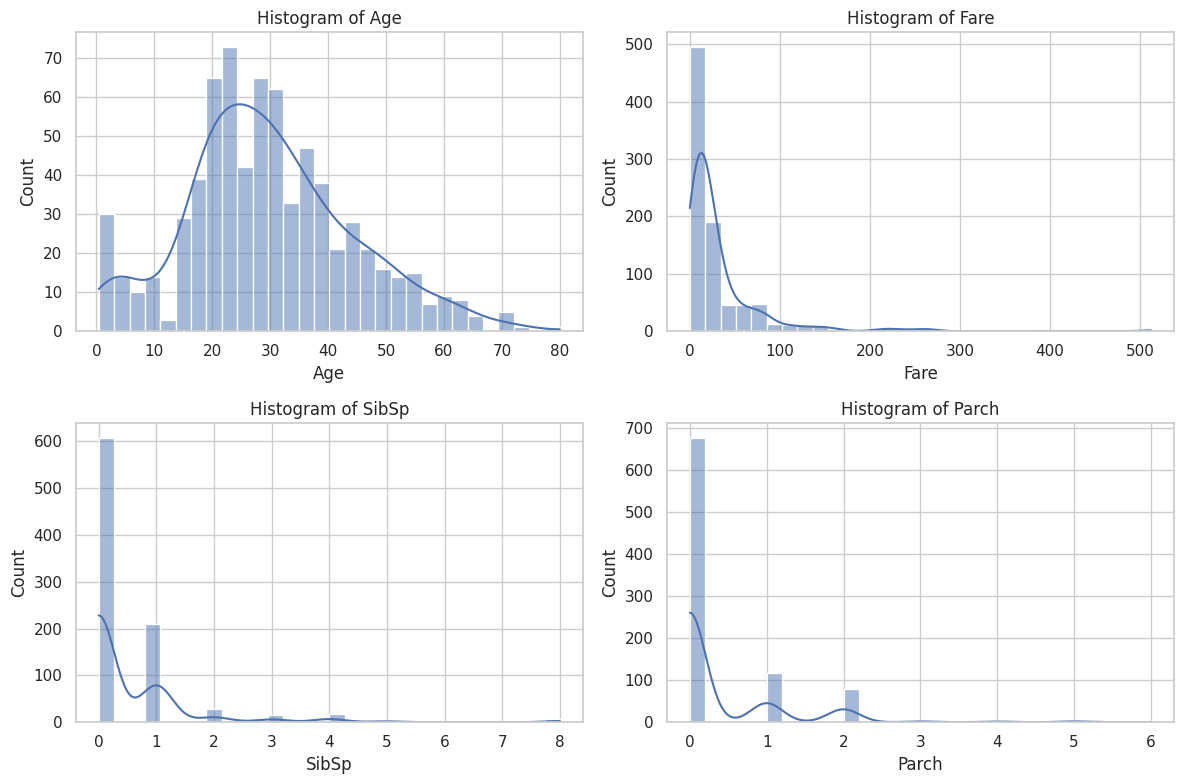

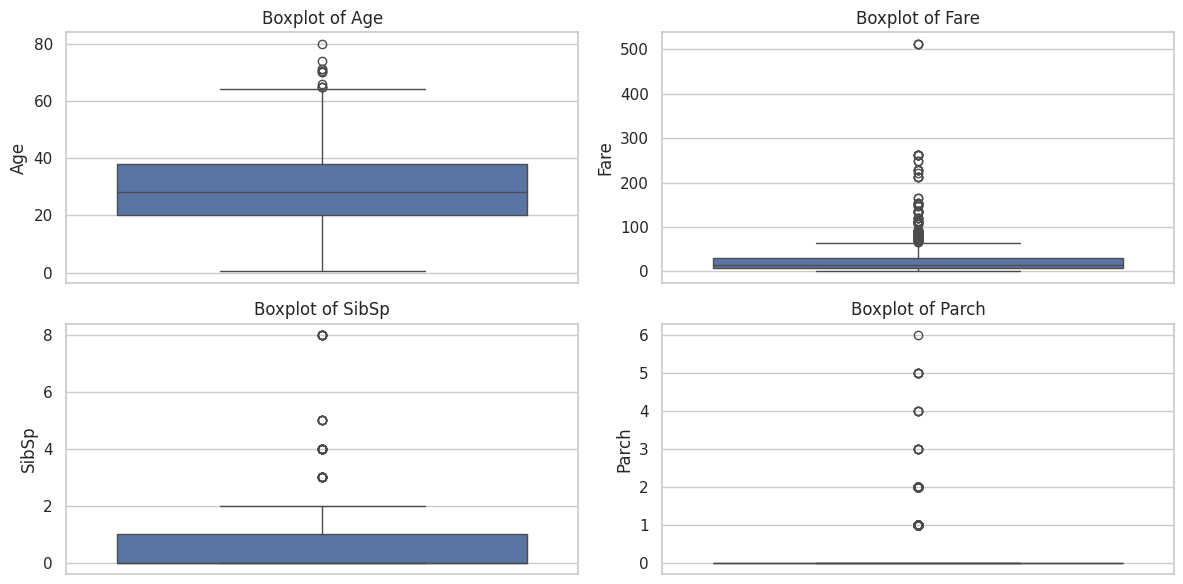

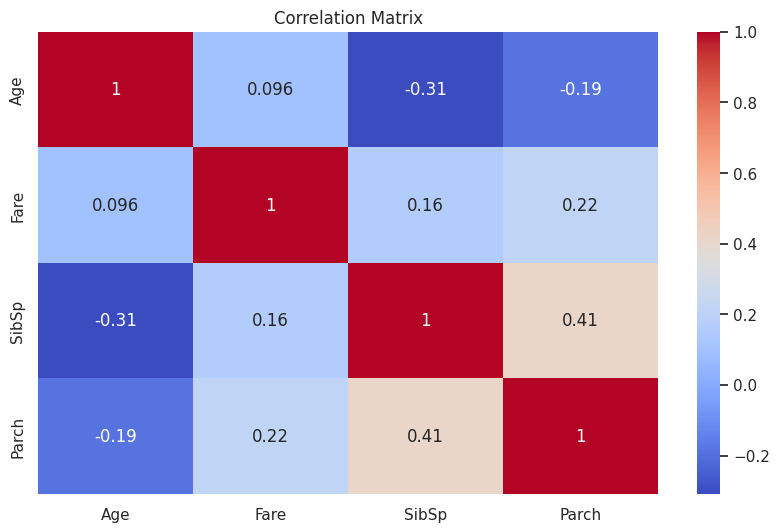

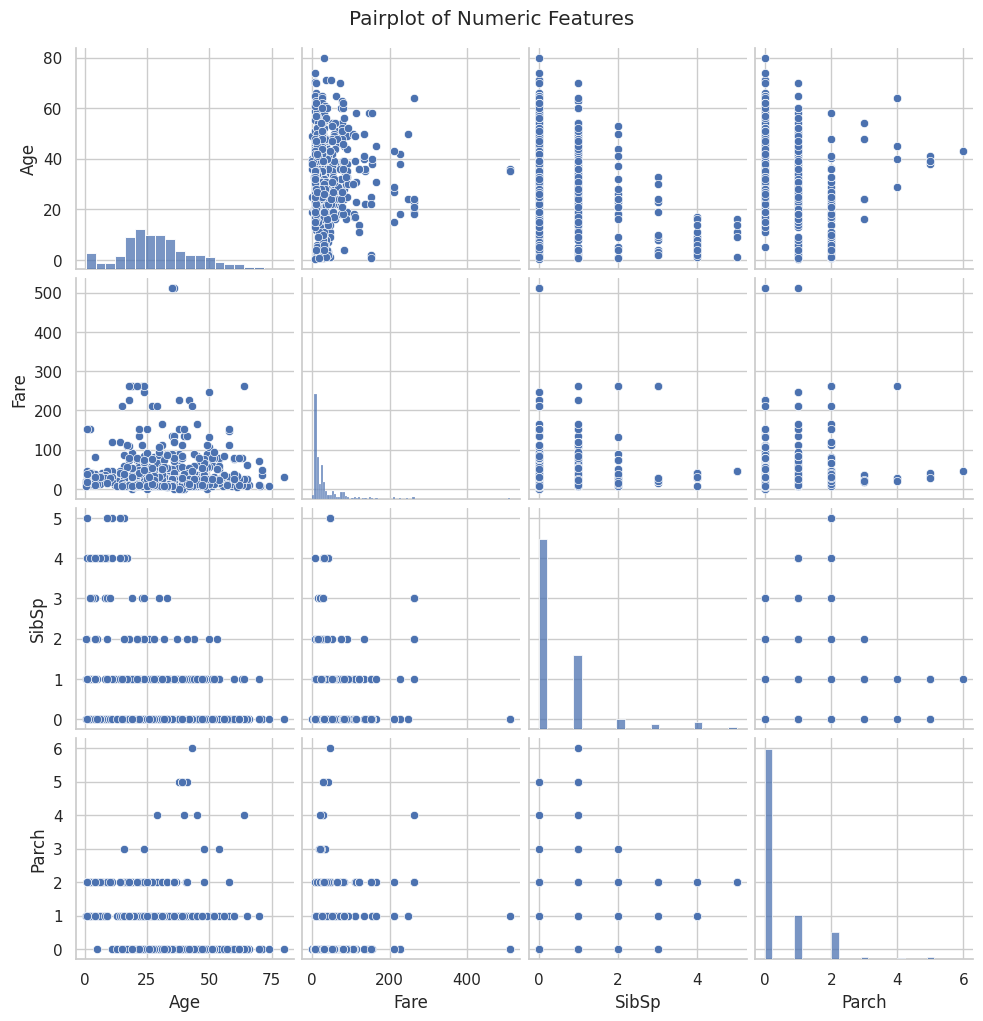

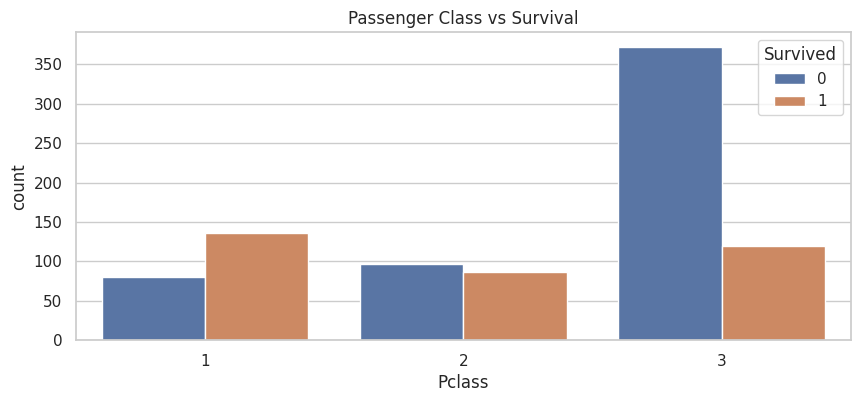

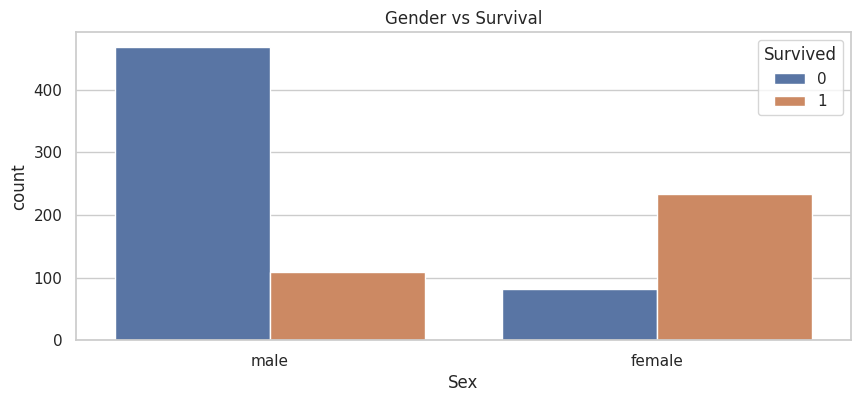


 Skewness:
Age: 0.39
Fare: 4.79
SibSp: 3.70
Parch: 2.75

 Basic Inferences:
- Younger passengers had slightly higher survival rates.
- Females were more likely to survive than males.
- Survival rate was higher in 1st class.
- Age and Fare distributions show skewness.
- There are mild correlations among SibSp, Parch, and Fare.

 EDA Complete. Output saved as 'titanic_eda_output.csv'


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 3: Summary Statistics
print(" Basic Statistical Summary:\n")
print(df.describe())

# Step 4: Check Missing Values
print("\n Missing Values:\n")
print(df.isnull().sum())

# Step 5: Histograms for Numeric Features
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Step 6: Boxplots for Outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 7: Correlation Matrix
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 8: Pairplot for Relationships
sns.pairplot(df[numeric_cols].dropna())
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# Step 9: Categorical Analysis (Bar Charts)
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Passenger Class vs Survival")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Gender vs Survival")
plt.show()

# Step 10: Skewness & Distribution Shape
print("\n Skewness:")
for col in numeric_cols:
    skew_val = df[col].dropna().skew()
    print(f"{col}: {skew_val:.2f}")

# Step 11: Final Thoughts (print basic inferences)
print("\n Basic Inferences:")
print("- Younger passengers had slightly higher survival rates.")
print("- Females were more likely to survive than males.")
print("- Survival rate was higher in 1st class.")
print("- Age and Fare distributions show skewness.")
print("- There are mild correlations among SibSp, Parch, and Fare.")

# Optional: Save cleaned version
df.to_csv("titanic_eda_output.csv", index=False)
print("\n EDA Complete. Output saved as 'titanic_eda_output.csv'")
